# <p style="text-align:center">Exoplanet hunting using NASA dataset</p>

## <p style="text-align:center">Importing the neccessary datasets</p>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score,roc_curve,f1_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler, normalize
from pickle import dump,load
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

## <p style="text-align:center">Importing keras framework for neural networks

In [2]:
from tensorflow import keras

## <p style="text-align:center">Importing the dataset</p>

<p style="font-size:20px;font-family:monospace"><strong>Dataset Source:</strong> <a href="https://www.kaggle.com/datasets/keplersmachines/kepler-labelled-time-series-data" style="font-family:Montserrat;color:rgb(78,183,227);text-decoration:None">Kaggle</p>

In [3]:
data_train = pd.read_csv("exoTrain.csv")
data_train.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [4]:
data_train.shape

(5087, 3198)

In [5]:
all(data_train.isna().any())

False

In [6]:
data_train.iloc[:,:15].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LABEL    5087 non-null   int64  
 1   FLUX.1   5087 non-null   float64
 2   FLUX.2   5087 non-null   float64
 3   FLUX.3   5087 non-null   float64
 4   FLUX.4   5087 non-null   float64
 5   FLUX.5   5087 non-null   float64
 6   FLUX.6   5087 non-null   float64
 7   FLUX.7   5087 non-null   float64
 8   FLUX.8   5087 non-null   float64
 9   FLUX.9   5087 non-null   float64
 10  FLUX.10  5087 non-null   float64
 11  FLUX.11  5087 non-null   float64
 12  FLUX.12  5087 non-null   float64
 13  FLUX.13  5087 non-null   float64
 14  FLUX.14  5087 non-null   float64
dtypes: float64(14), int64(1)
memory usage: 596.3 KB


## <p style="text-align:center">Data preprocessing</p>

### DATA CLEANING AND VISUALIZATTION

In [7]:
data_train['LABEL']=data_train['LABEL'].apply(lambda x:1 if x==2 else 0)

In [8]:
data_train.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,1,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,1,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,1,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,1,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [9]:
count_list=list(data_train['LABEL'].value_counts())
def percentage(count_list):
    return [i*100/sum(count_list) for i in count_list]
count_list=percentage(count_list)

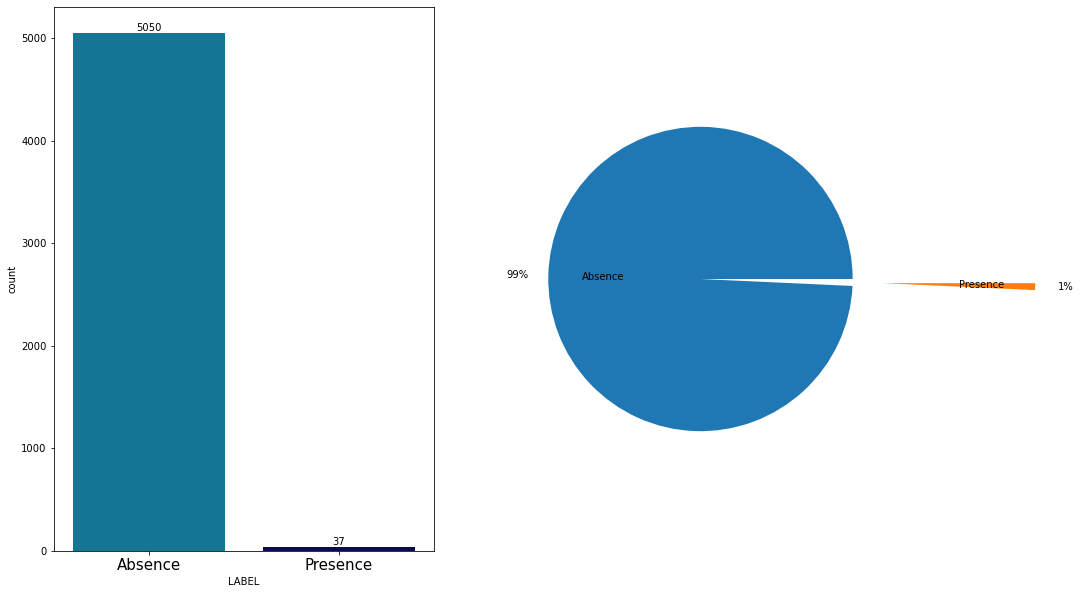

In [10]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
ax_1 = sns.countplot(data_train['LABEL'],palette="ocean_r")
ax_1.set_xticklabels(['Absence','Presence'],fontsize=15)
for cont in ax_1.containers:
    ax_1.bar_label(cont)
plt.subplot(1,2,2)
ax_2=plt.pie(count_list,labels=['Absence','Presence'],explode=(0,1.2),autopct='%.0f%%',pctdistance=1.2, labeldistance=0.5)
plt.show()

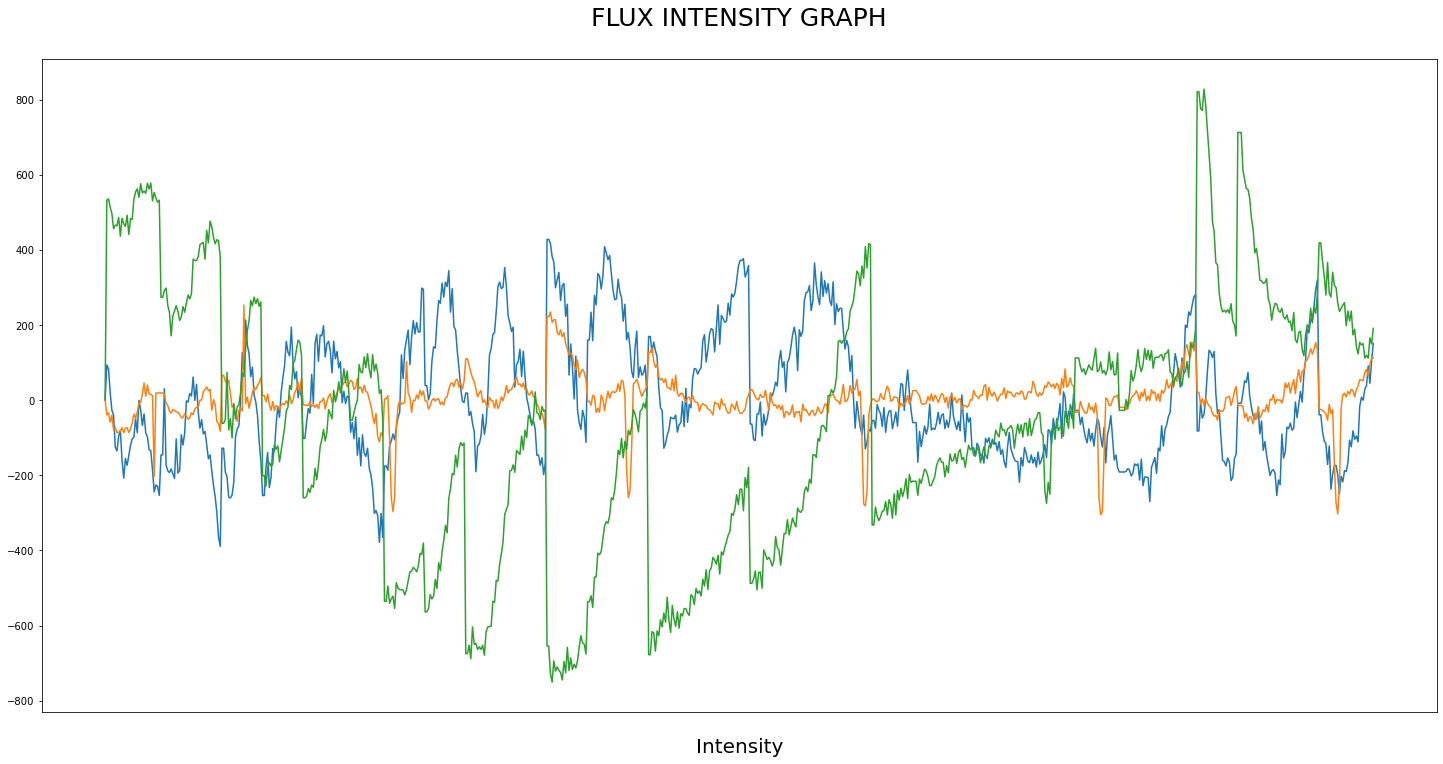

In [11]:
plt.figure(figsize=(25,12))
for i in range(3):
    ax=plt.plot(data_train.iloc[i,:750])
plt.xticks([])
plt.title("FLUX INTENSITY GRAPH\n",fontsize=25)
plt.xlabel("\nIntensity",fontsize=20)
plt.show()

In [12]:
X_train = data_train.drop('LABEL',axis=1)
y_train = data_train['LABEL']

In [13]:
data_test = pd.read_csv("exoTest.csv")
X_test = data_test.drop('LABEL',axis=1)
y_test = data_test['LABEL'].apply(lambda x:1 if x==2 else 0)

In [14]:
X_test.shape

(570, 3197)

In [15]:
y_test.shape

(570,)

### NORMALIZING THE DATASET 

In [16]:
X_train = normalize(X_train)
X_test = normalize(X_test)

In [17]:
colu = list(data_train.columns)
colu.remove('LABEL')
X_train = pd.DataFrame(data=X_train,columns=colu)
X_test = pd.DataFrame(data=X_test,columns=colu)

In [18]:
X_train

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,0.010309,0.009206,0.002208,-0.002964,-0.004345,-0.013699,-0.014849,-0.010575,-0.008775,-0.017594,...,-0.008575,-0.011220,-0.011220,0.002760,0.005335,0.010165,0.004319,0.006747,0.000558,-0.004343
1,-0.011373,-0.009896,-0.017124,-0.011727,-0.023200,-0.021299,-0.025318,-0.024961,-0.024563,-0.021465,...,-0.000959,-0.009422,-0.009422,-0.007281,-0.001422,0.000222,-0.003423,0.001890,0.004680,0.005830
2,0.033411,0.033617,0.032225,0.031170,0.028632,0.029231,0.029137,0.030510,0.027384,0.030384,...,-0.004497,0.000835,0.000835,-0.001875,-0.001310,0.000317,-0.000740,-0.001813,-0.004392,-0.006064
3,0.055889,0.059461,0.051752,0.051029,0.054386,0.053523,0.055172,0.053285,0.053475,0.055343,...,0.000977,-0.000638,-0.000638,0.005144,0.003428,-0.002169,-0.001501,-0.002963,-0.002970,0.002393
4,-0.048077,-0.048311,-0.048587,-0.047551,-0.045921,-0.044919,-0.043350,-0.044408,-0.042969,-0.042157,...,-0.025809,-0.017441,-0.017441,-0.015512,-0.019269,-0.019042,-0.017356,-0.016702,-0.017881,-0.022169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,-0.022060,-0.022314,-0.018904,-0.023361,-0.016321,-0.016379,-0.018116,-0.011821,-0.007421,-0.002851,...,0.033590,0.035345,0.037670,0.037356,0.037529,0.036422,-0.005868,-0.004080,0.000775,0.004628
5083,0.083738,0.075384,0.076867,0.072070,0.063887,0.052098,0.050405,0.038823,0.041697,0.032517,...,-0.002242,-0.000409,-0.006455,-0.003201,-0.013015,-0.011520,0.003218,0.008484,-0.003861,0.003010
5084,0.078705,0.080032,0.075348,0.068226,0.080818,0.076261,0.072812,0.073376,0.068402,0.068664,...,-0.007721,-0.015514,-0.014023,0.008922,0.004595,-0.000999,0.018923,0.025455,0.022763,0.022867
5085,0.006142,0.003360,-0.005290,-0.004630,0.002669,-0.001206,0.006190,-0.000048,0.005273,0.010113,...,0.017460,-0.005193,-0.008200,-0.007412,-0.015788,-0.002412,-0.007476,-0.023393,-0.010306,-0.004100


In [19]:
X_test

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,0.071098,0.059432,0.051277,0.028871,0.027353,0.023361,0.011013,0.004140,0.003932,-0.013030,...,0.008611,0.011440,0.008564,-0.000961,0.007906,0.026985,0.018937,0.021220,0.159792,0.034232
1,0.061581,0.061188,0.061373,0.061111,0.060800,0.060450,0.060398,0.059787,0.059583,0.058599,...,-0.006247,-0.010564,-0.013213,-0.017181,-0.019586,-0.022126,-0.024325,-0.025401,-0.024635,-0.021842
2,0.127420,0.123348,0.116193,0.101850,0.091365,0.075360,0.066506,0.054764,0.031274,0.022702,...,0.002689,-0.007795,-0.007286,-0.009052,-0.012388,-0.026336,-0.014369,-0.024546,-0.005551,0.004622
3,-0.036586,-0.036644,-0.037477,-0.037030,-0.033021,-0.034756,-0.035046,-0.033065,-0.031427,-0.030100,...,0.005419,0.004121,0.004121,0.003048,0.000435,0.000919,0.000897,-0.005351,-0.011408,-0.009541
4,-0.003919,-0.001573,-0.000907,-0.000631,-0.001597,-0.002382,-0.000089,-0.004476,-0.000499,0.001448,...,-0.003750,-0.006125,-0.002689,-0.002097,-0.003343,-0.008451,-0.008067,-0.006138,-0.006867,-0.001767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,0.036350,0.031652,0.031051,0.032833,0.024418,0.020370,0.018090,0.016256,0.013149,0.010414,...,-0.011993,-0.016202,-0.021593,-0.020357,-0.017489,-0.016195,-0.022876,-0.020738,-0.019996,-0.018839
566,-0.000416,0.005738,0.007230,0.004859,0.009555,-0.011024,-0.011684,-0.005252,-0.013361,-0.012123,...,-0.014344,-0.006929,-0.020753,-0.013835,-0.014009,-0.015825,-0.004153,-0.006154,-0.012702,-0.013003
567,-0.056897,-0.046489,-0.043434,-0.045109,-0.041580,-0.026210,-0.032805,-0.026031,-0.013821,-0.015570,...,-0.000769,-0.001728,0.001664,-0.005078,-0.012568,-0.018056,-0.004477,0.005762,0.015233,0.019700
568,0.008211,0.007694,0.004387,0.004376,0.006296,0.002004,0.001045,0.003403,0.002541,-0.000392,...,0.000219,0.001036,-0.001476,-0.001605,0.001896,-0.000921,-0.003331,-0.000758,-0.000582,0.001582


### FEATURE SCALING USING SCANDARD SCALING

In [20]:
stand_sc = StandardScaler()
X_train = pd.DataFrame(data=stand_sc.fit_transform(X_train.values),columns=X_train.columns)
X_test = pd.DataFrame(data=stand_sc.transform(X_test.values),columns=X_test.columns)

In [21]:
pca = PCA(n_components=37)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train = pd.DataFrame(data=X_train)
X_test = pd.DataFrame(data=X_test)

### OVERSAMPLING USING SYNTHETIC MINORITY OVERSAMPLING TECHNIQUE(SMOTE)

In [22]:
print(f"The number of instances where the target was a exoplanet is {sum(y_train==1)}\nwhereas the number of instances where the target was not a exoplanet is {sum(y_train==0)} ")

The number of instances where the target was a exoplanet is 37
whereas the number of instances where the target was not a exoplanet is 5050 


In [23]:
smote = SMOTE()
X,Y = smote.fit_resample(X_train,y_train)

In [24]:
Y.value_counts()

1    5050
0    5050
Name: LABEL, dtype: int64

In [25]:
X.shape

(10100, 37)

In [26]:
print(f"The number of instances where the target was a exoplanet is {sum(Y==1)}\nwhereas the number of instances where the target was not a exoplanet is {sum(Y==0)} ")

The number of instances where the target was a exoplanet is 5050
whereas the number of instances where the target was not a exoplanet is 5050 


## <p style="text-align:center">Model Formulation</p>

In [27]:
class machine_learning:
    def __init__(self,models):
        self.models=models
        self.metrics={}
        self.prediction={}
    def fit(self,X,Y):
        for model in self.models:
            model.fit(X,Y)
        return self.models
    def predict(self,X_test):
        self.prediction={str(model):model.fit(X_test) for model in self.models}
        return self.prediction
    def score(self,X_test,y_test):
        self.metrics={str(model):[model.score(X_test,y_test)*100] for model in self.models}
        return self.metrics

In [28]:
ml = machine_learning([LogisticRegression(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(),BernoulliNB()])
fit_models=ml.fit(X,Y)

## <p style="text-align:center">Implementing Neural Network</p>

### BULIDING THE BLUEPRINT

In [29]:
neural_model = keras.Sequential([
    keras.layers.Dense(37,activation='relu'),
    keras.layers.Dense(18,activation='relu'),
    keras.layers.Dense(9,activation='relu'),
    keras.layers.Dense(4,activation='relu'),
    keras.layers.Dense(2,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
neural_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### FITTING THE DATA

In [31]:
neural_model.fit(X,Y,epochs=20)

Epoch 1/20
316/316 [==============================] - 0s 857us/step - loss: 0.0114 - accuracy: 0.9997
Epoch 2/20
316/316 [==============================] - 0s 872us/step - loss: 0.0102 - accuracy: 0.9997
Epoch 3/20
316/316 [==============================] - 0s 907us/step - loss: 0.0091 - accuracy: 0.9997
Epoch 4/20
316/316 [==============================] - 0s 926us/step - loss: 0.0082 - accuracy: 0.9997
Epoch 5/20
316/316 [==============================] - 0s 860us/step - loss: 0.0074 - accuracy: 0.9997
Epoch 6/20
316/316 [==============================] - 0s 1ms/step - loss: 0.0067 - accuracy: 0.9997
Epoch 7/20
316/316 [==============================] - 0s 942us/step - loss: 0.0061 - accuracy: 0.9997
Epoch 8/20
316/316 [==============================] - 0s 839us/step - loss: 0.0056 - accuracy: 0.9997
Epoch 9/20
316/316 [==============================] - 0s 831us/step - loss: 0.0051 - accuracy: 0.9997
Epoch 10/20
316/316 [==============================] - 0s 858us/step - loss: 0.0047 

## <p style="text-align:center">Model Analysis</p>

### NEURAL NETWORK ANALYSIS

18/18 [==============================] - 0s 822us/step


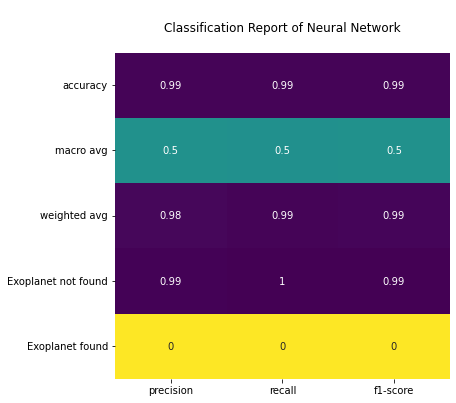

In [36]:
plt.figure(figsize=(6,6))
plt.title("\nClassification Report of Neural Network\n")
cla_re = pd.DataFrame(classification_report(y_test,np.round(neural_model.predict(X_test)),output_dict=True))
cla_re['Exoplanet not found']=cla_re['0']
cla_re['Exoplanet found']=cla_re['1']
cla_re.drop(['0','1'],axis=1,inplace=True)
sns.heatmap(cla_re.iloc[:-1,:].T,annot=True,cbar=False,cmap='viridis_r')
plt.show()

18/18 [==============================] - 0s 763us/step


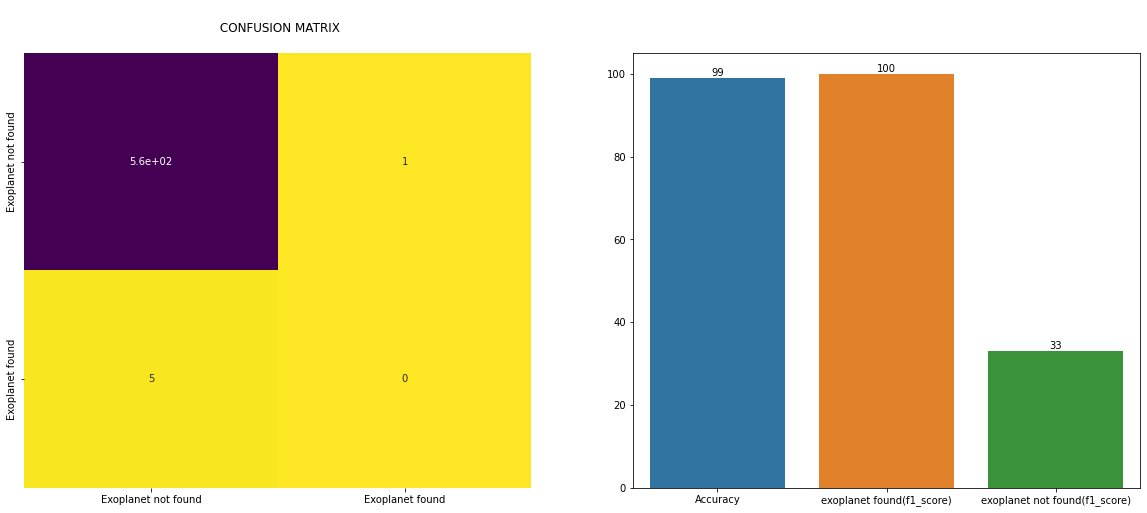

In [37]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
ax = sns.heatmap(confusion_matrix(y_test,np.round(neural_model.predict(X_test))),annot=True,cbar=False,cmap='viridis_r')
ax.set_title("\n CONFUSION MATRIX\n")
ax.set_xticklabels(['Exoplanet not found','Exoplanet found'])
ax.set_yticklabels(['Exoplanet not found','Exoplanet found'])
plt.subplot(1,2,2)
recall_score
ax_2 = sns.barplot(x=['Accuracy','exoplanet found(f1_score)','exoplanet not found(f1_score)'],y=[99,100,33])
for cont in ax_2.containers:
    ax_2.bar_label(cont)
plt.show()

### MACHINE LEARNING MODELS ANALYSIS

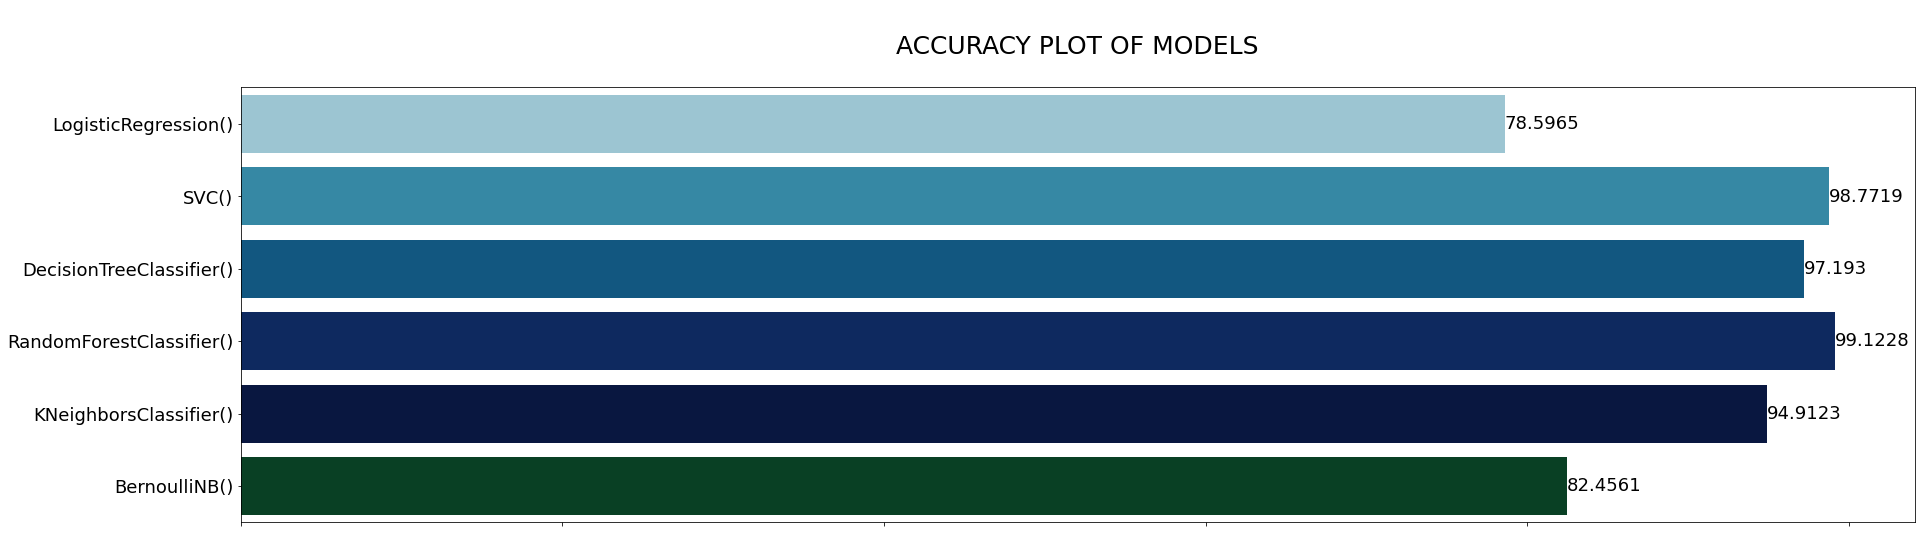

In [38]:
score = ml.score(X_test,y_test)
plt.figure(figsize=(30,8))
ax = sns.barplot(y=list(score.keys()),x=[i[0] for i in score.values()],palette='ocean_r')
for cont in ax.containers:
    ax.bar_label(cont,fontsize=18)
ax.set_yticklabels(ax.get_ymajorticklabels(),fontsize=18)
ax.set_xticklabels([])
ax.set_title("\nACCURACY PLOT OF MODELS\n",fontsize=25)
plt.show()

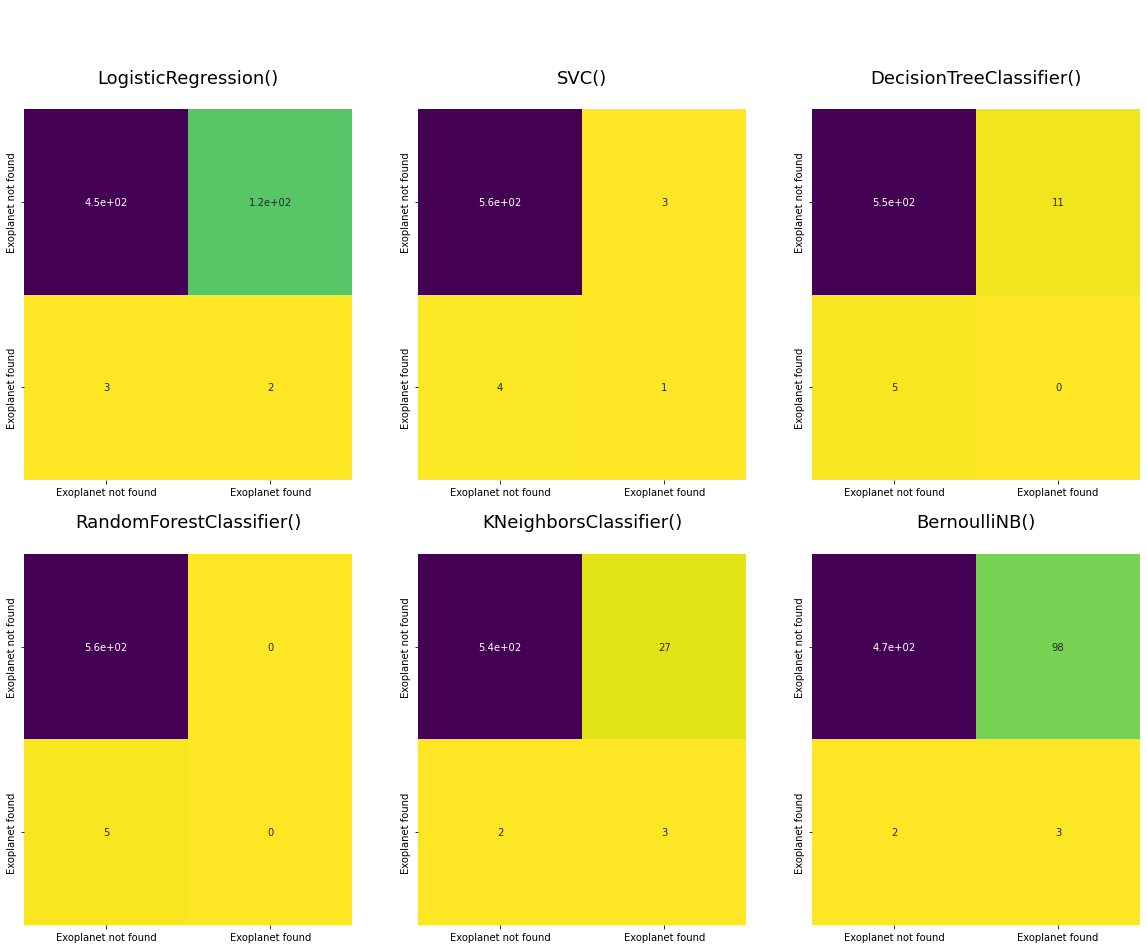

In [39]:
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(20,15))
row=col=0
for i in fit_models:
    if col==2:
        ax = sns.heatmap(confusion_matrix(y_test,i.predict(X_test)),ax=axes[row][col],annot=True,cbar=False,cmap='viridis_r')
        ax.set_title('\n\n\n'+str(i)+"\n",fontsize=18)
        ax.set_xticklabels(['Exoplanet not found','Exoplanet found'])
        ax.set_yticklabels(['Exoplanet not found','Exoplanet found'])
        col=0
        row+=1
    else:
        ax = sns.heatmap(confusion_matrix(y_test,i.predict(X_test)),ax=axes[row][col],annot=True,cbar=False,cmap='viridis_r')
        ax.set_title('\n\n\n'+str(i)+"\n",fontsize=18)
        ax.set_xticklabels(['Exoplanet not found','Exoplanet found'])
        ax.set_yticklabels(['Exoplanet not found','Exoplanet found'])
        col+=1
plt.show()        

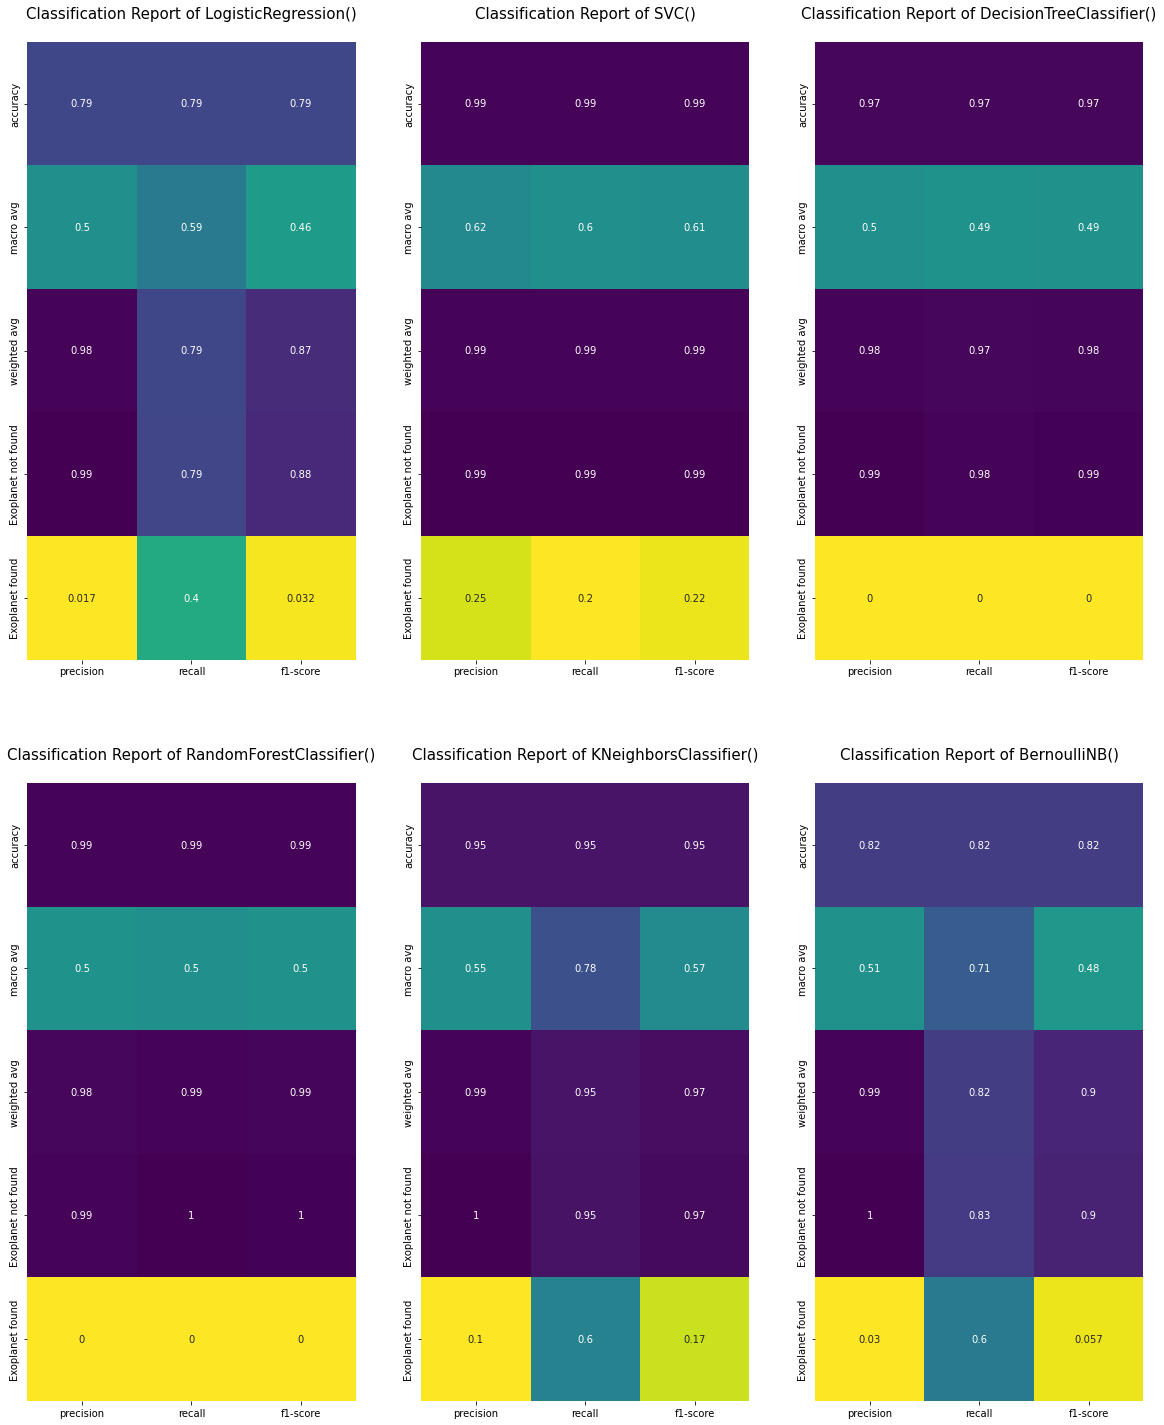

In [40]:
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(20,25))
row=col=0
for model in fit_models:
    if col==2:
       cla_re = pd.DataFrame(classification_report(y_test,model.predict(X_test),output_dict=True))
       cla_re['Exoplanet not found']=cla_re['0']
       cla_re['Exoplanet found']=cla_re['1']
       cla_re.drop(['0','1'],axis=1,inplace=True)
       ax=sns.heatmap(cla_re.iloc[:-1,:].T,annot=True,cbar=False,cmap='viridis_r',ax=axes[row][col])
       ax.set_title("Classification Report of "+str(model)+"\n",fontsize=15)
       col=0
       row+=1
    else:
       cla_re = pd.DataFrame(classification_report(y_test,model.predict(X_test),output_dict=True))
       cla_re['Exoplanet not found']=cla_re['0']
       cla_re['Exoplanet found']=cla_re['1']
       cla_re.drop(['0','1'],axis=1,inplace=True)
       ax=sns.heatmap(cla_re.iloc[:-1,:].T,annot=True,cbar=False,cmap='viridis_r',ax=axes[row][col])
       ax.set_title("Classification Report of "+str(model)+"\n",fontsize=15)
       col+=1        